In [5]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
114,7,160,54,32,175,30.5,0.588,39,1
687,1,107,50,19,0,28.3,0.181,29,0
237,0,179,90,27,0,44.1,0.686,23,1
264,4,123,62,0,0,32.0,0.226,35,1
601,6,96,0,0,0,23.7,0.190,28,0


In [17]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [19]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
x = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [25]:
y_train

80     0
16     1
691    1
108    0
276    1
      ..
493    1
438    0
123    0
734    0
196    0
Name: Outcome, Length: 614, dtype: int64

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)


KNeighborsClassifier()

In [27]:
y_predict = knn.predict(x_test)

In [28]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.421875

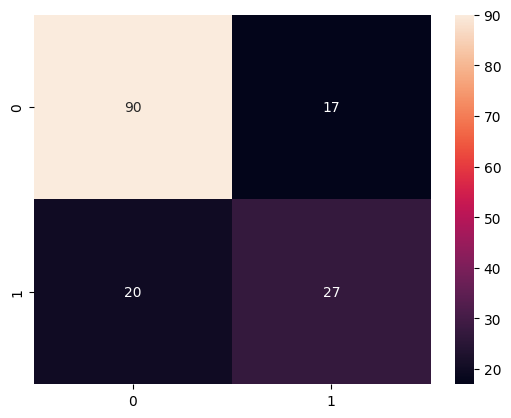

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()


In [30]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154



In [31]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn, X=x, y=y, cv=5)


In [34]:
from sklearn.metrics import classification_report
print('Classification Report :\n ', classification_report(y, predict))

Classification Report :
                precision    recall  f1-score   support

           0       0.77      0.83      0.80       500
           1       0.62      0.53      0.57       268

    accuracy                           0.72       768
   macro avg       0.69      0.68      0.68       768
weighted avg       0.72      0.72      0.72       768



In [35]:
from joblib import dump

dump(knn, 'knn_model.joblib')

['knn_model.joblib']

In [36]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')